<a href="https://colab.research.google.com/github/ShakilaMhd/MNIST-Dataset/blob/main/non_linear_regression_Assign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

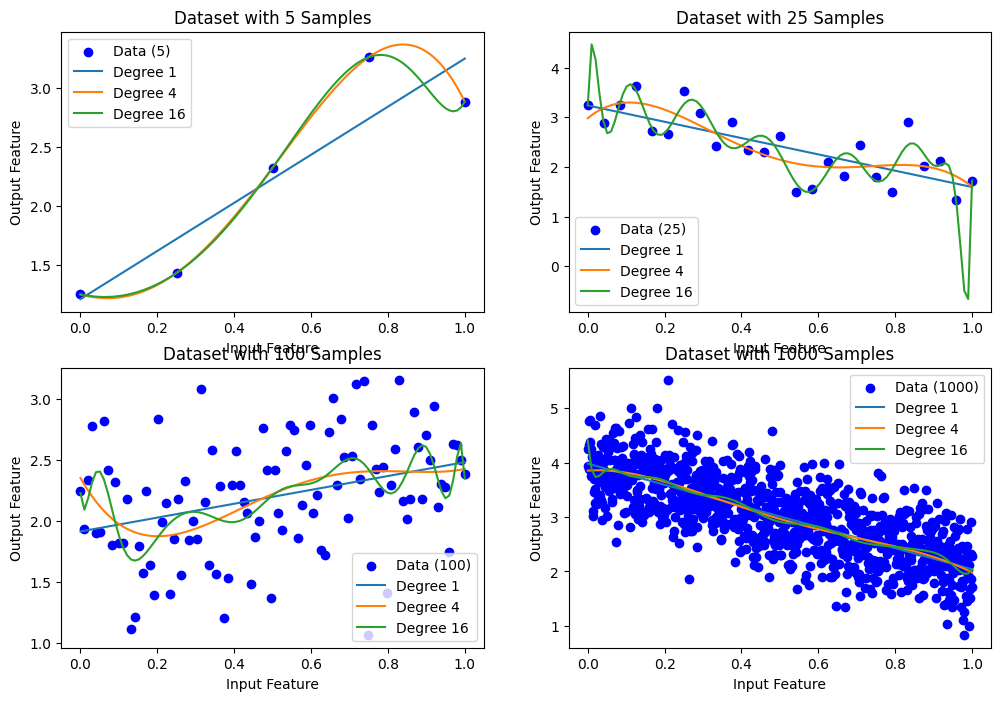

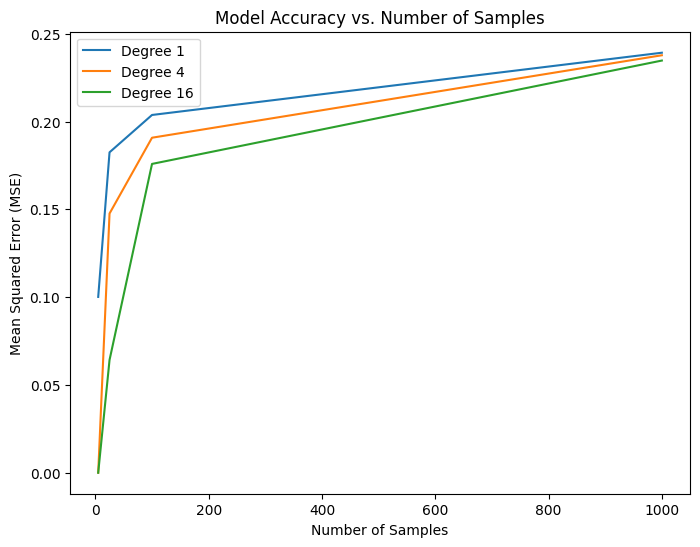

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Function to generate synthetic data based on a line equation with noise
def generate_synthetic_data(count, slope, intercept, noise_std=1.0):
    np.random.seed(42)
    X = np.linspace(0, 1, count).reshape(-1, 1)
    y = slope * X + intercept + np.random.normal(0, noise_std, size=(count, 1))
    return X, y

# Function to perform polynomial regression and evaluate the model
def perform_polynomial_regression(X, y, degree):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)

    mse = mean_squared_error(y, model.predict(X))

    return model, mse

# Generate four datasets with different counts and add noise
datasets = [
    {'count': 5, 'slope': 2, 'intercept': 1},
    {'count': 25, 'slope': -1, 'intercept': 3},
    {'count': 100, 'slope': 0.5, 'intercept': 2},
    {'count': 1000, 'slope': -2, 'intercept': 4}
]

# Polynomial degrees to test
degrees = [1, 4, 16]

# Collect information about accuracy (MSE) for each model
accuracies = {degree: [] for degree in degrees}

# Perform polynomial regression for each dataset and degree
for dataset in datasets:
    X, y = generate_synthetic_data(dataset['count'], dataset['slope'], dataset['intercept'], noise_std=0.5)

    for degree in degrees:
        _, mse = perform_polynomial_regression(X, y, degree)
        accuracies[degree].append(mse)

# Plot individual regression lines and collect accuracy information
plt.figure(figsize=(12, 8))

for i, dataset in enumerate(datasets):
    X, y = generate_synthetic_data(dataset['count'], dataset['slope'], dataset['intercept'], noise_std=0.5)
    plt.subplot(2, 2, i+1)
    plt.scatter(X, y, color='blue', label=f'Data ({len(X)})')

    for degree in degrees:
        model, _ = perform_polynomial_regression(X, y, degree)
        X_test = np.linspace(0, 1, 100).reshape(-1, 1)
        y_pred = model.predict(X_test)
        plt.plot(X_test, y_pred, label=f'Degree {degree}')

    plt.xlabel('Input Feature')
    plt.ylabel('Output Feature')
    plt.title(f'Dataset with {dataset["count"]} Samples')
    plt.legend()

# Plot the final accuracy graph
plt.figure(figsize=(8, 6))
for degree in degrees:
    plt.plot([dataset['count'] for dataset in datasets], accuracies[degree], label=f'Degree {degree}')

plt.xlabel('Number of Samples')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model Accuracy vs. Number of Samples')
plt.legend()
plt.show()
